In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import datetime
import matplotlib.pyplot as plt

spark = SparkSession.builder.getOrCreate()

df = spark.read.parquet("output_data.parquet")
df.show(10)

22/04/07 16:55:26 WARN Utils: Your hostname, gosroth resolves to a loopback address: 127.0.1.1; using 192.168.1.242 instead (on interface enp4s0)
22/04/07 16:55:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/07 16:55:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/04/07 16:55:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+-----+----+-----+------+
|  zip|year|month| price|
+-----+----+-----+------+
|01001|2019|   10|2000.0|
|01001|2019|   10|1100.0|
|01001|2019|   10|1400.0|
|01001|2019|   10|1600.0|
|01001|2019|   10|1800.0|
|01001|2019|   10|1300.0|
|01001|2019|   10|1600.0|
|01001|2019|   10|1635.0|
|01001|2019|   10|1400.0|
|01001|2019|   10|1365.0|
+-----+----+-----+------+
only showing top 10 rows



In [2]:
# Pick a zip code to analyze
zip = "98125"

df = df.select("year", "month", "price").where(col("zip") == zip).groupBy("year", "month").agg(avg("price").alias("avg_price"),
                                                                                               min("price").alias("min_price"),
                                                                                               max("price").alias("max_price"))
df.show(10)

+----+-----+------------------+------------------+-----------------+
|year|month|         avg_price|         min_price|        max_price|
+----+-----+------------------+------------------+-----------------+
|2019|   10|2124.4169171304893|            1095.0|           4000.0|
|2020|    6|1733.4948051948052|            1425.0|           2475.0|
|2020|   11| 1659.901515151515|            1195.0|           3075.0|
|2020|    3|2047.3647702991452|            1150.0|           7800.0|
|2020|    9|1753.9816607997711|             895.0|           3600.0|
|2019|    8|1757.7615881517002|            1230.0|           2600.0|
|2019|    6|2007.0731950844852|            1095.0|           4800.0|
|2020|   12|1729.8044477028348|            1095.0|           3075.0|
|2020|    4|2094.0344246031746|            1250.0|           4950.0|
|2021|    2| 1600.161544011544|1335.8333333333333|2152.909090909091|
+----+-----+------------------+------------------+-----------------+
only showing top 10 rows



In [3]:
output = df.sort("year", "month").toPandas()
#output['date'] = output[['year', 'month']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
output['day'] = 15
output['date'] = pd.to_datetime(output[['year', 'month', 'day']])
print(output)

    year  month    avg_price    min_price    max_price  day       date
0   2019      6  2007.073195  1095.000000  4800.000000   15 2019-06-15
1   2019      7  2152.185185  1195.000000  3995.000000   15 2019-07-15
2   2019      8  1757.761588  1230.000000  2600.000000   15 2019-08-15
3   2019      9  1865.822811  1095.000000  3500.000000   15 2019-09-15
4   2019     10  2124.416917  1095.000000  4000.000000   15 2019-10-15
5   2019     11  2061.660097  1160.000000  4900.000000   15 2019-11-15
6   2019     12  2048.137383  1095.000000  3900.000000   15 2019-12-15
7   2020      1  2250.751882  1295.000000  4750.000000   15 2020-01-15
8   2020      2  1982.766624  1000.000000  6500.000000   15 2020-02-15
9   2020      3  2047.364770  1150.000000  7800.000000   15 2020-03-15
10  2020      4  2094.034425  1250.000000  4950.000000   15 2020-04-15
11  2020      5  1743.870513  1195.000000  2475.000000   15 2020-05-15
12  2020      6  1733.494805  1425.000000  2475.000000   15 2020-06-15
13  20

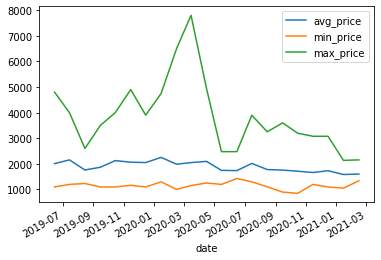

In [4]:
%matplotlib inline
output.plot(x="date", y=["avg_price", "min_price", "max_price"])
plt.show()